In [89]:
import json

file = open("face_detection.json", "r") 
file_data = file.read()
raw_data = []

In [90]:
for x in file_data.split("\n"):
    if(x.find("content") == 2):
        jsonrow = json.loads(x)
        raw_data.append(jsonrow)

In [91]:
# example row :::::

# content
# http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg
# <class 'str'>

# annotation
# [{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}]
# <class 'list'>

# extras
# None
# <class 'NoneType'>

# metadata
# {'first_done_at': 1529944126000, 'last_updated_at': 1529944126000, 'sec_taken': 19, 'last_updated_by': 'JcJnInHM9JcDyvJooMepvP4Om653', 'status': 'done', 'evaluation': 'NONE'}
# <class 'dict'>


In [ ]:
# {'label': ['Face'], 
# 'notes': '', 
# 'points': [
#         {'x': 0.08615384615384615, 'y': 0.3063063063063063}, 
#         {'x': 0.1723076923076923, 'y': 0.45345345345345345}
#         ], 
# 'imageWidth': 650,
# 'imageHeight': 333}, 

In [111]:
import urllib.request
import os
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

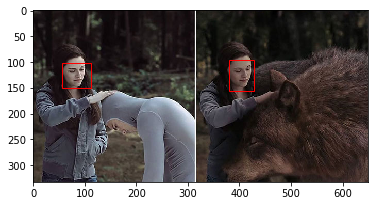

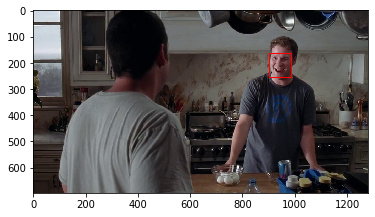

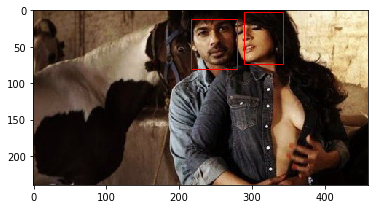

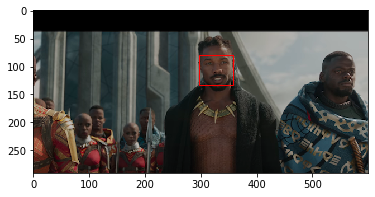

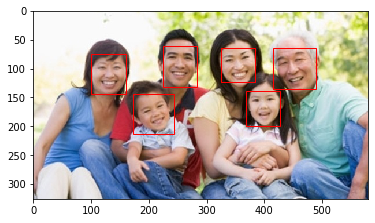

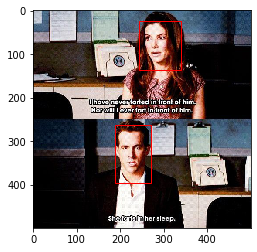

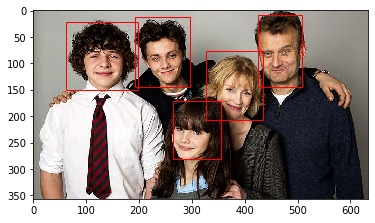

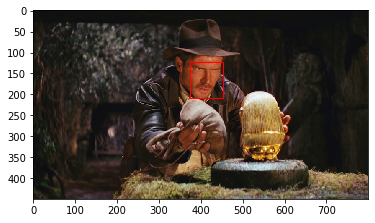

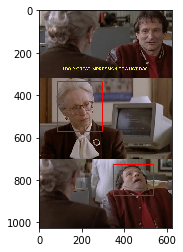

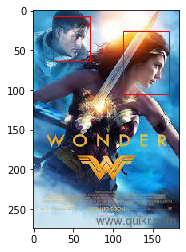

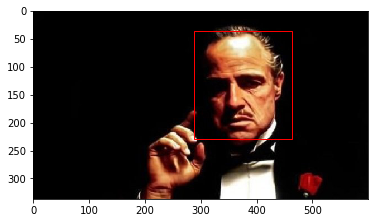

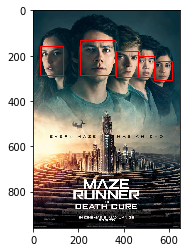

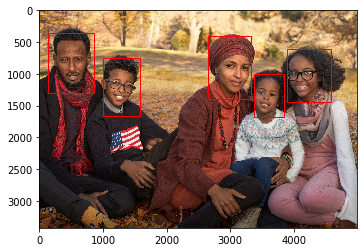

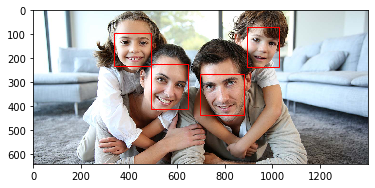

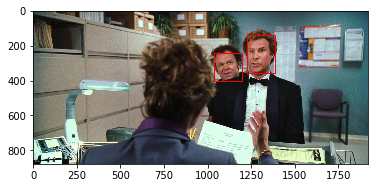

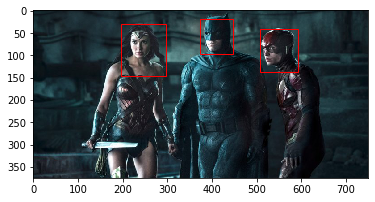

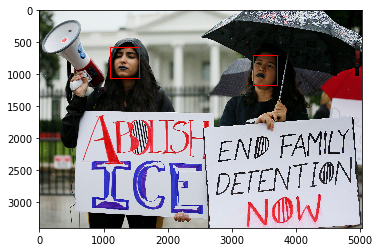

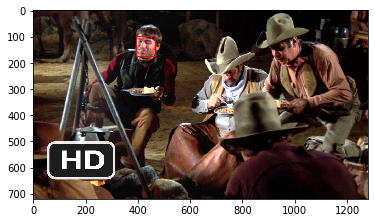

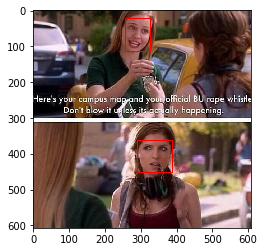

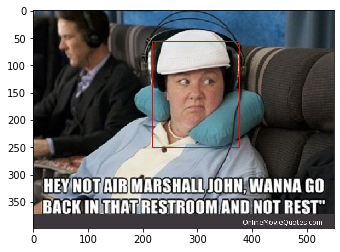

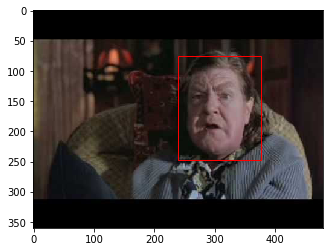

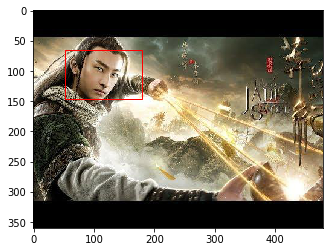

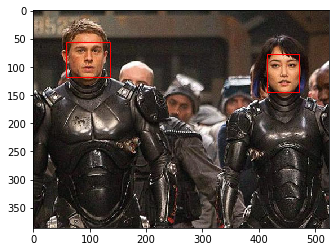

In [160]:
#  showcasing the images with the bounding boxes::::::::


for i in tqdm(range(25,30)):
    try:
        urllib.request.urlretrieve(raw_data[i]["content"],"./downloaded_data/"+str(i)+".jpg")
        if(raw_data[i]["annotation"] is not None):
            img = mpimg.imread("./downloaded_data/"+str(i)+".jpg")
            imgplot = plt.imshow(img)
            
            for annotation in raw_data[i]["annotation"]:
                x_left = (annotation["points"][0]["x"]*annotation["imageWidth"])
                x_right = (annotation["points"][1]["x"]*annotation["imageWidth"])
                y_top = (annotation["points"][0]["y"]*annotation["imageHeight"])
                y_bottom = (annotation["points"][1]["y"]*annotation["imageHeight"])
               
                width_bb = x_right - x_left
                height_bb = y_bottom - y_top
                
                print(end="\n\n\n\n")
                plt.gca().add_patch(Rectangle(
                    (x_left,y_top),
                    width_bb,height_bb,
                    linewidth=1,edgecolor='r',facecolor='none'))
            plt.show()
            
    except IOError:
        # Stop in case you reach 100 errors downloading images
        print ("File does not exist")

In [183]:
# deleting the contents of the folder for fresh download

import glob, os.path

filelist = glob.glob(os.path.join("./downloaded_data", "*.jpg"))
for f in filelist:
    os.remove(f)

In [184]:
list_of_img_data = []
# {imgname,imglocation,faceloc : [{x_left,x_right,y_top,y_bottom},{}]}

In [185]:
for i in tqdm(range(0,len(raw_data))):
    try:
        if(raw_data[i]["annotation"] is not None):
            urllib.request.urlretrieve(raw_data[i]["content"],"./downloaded_data/"+str(i)+".jpg")
            faceloc = []
            for annotation in raw_data[i]["annotation"]:
                x_left = (annotation["points"][0]["x"]*annotation["imageWidth"])
                x_right = (annotation["points"][1]["x"]*annotation["imageWidth"])
                y_top = (annotation["points"][0]["y"]*annotation["imageHeight"])
                y_bottom = (annotation["points"][1]["y"]*annotation["imageHeight"])
                faceloc.append({"x_left":x_left , "x_right":x_right,
                                "y_top":y_top , "y_bottom":y_bottom})
            list_of_img_data.append({"Name":str(i),
                                     "imgDest": "./downloaded_data/"+str(i)+".jpg",
                                     "faceloc":faceloc
                                     })

            
    except IOError:
        # Stop in case you reach 100 errors downloading images
        print ("File does not exist")

In [187]:
len(list_of_img_data)

409

In [188]:
with open('data.json', 'w') as outfile:
    json.dump(list_of_img_data, outfile)